In [51]:
#インポート
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#フォント
import matplotlib as mpl

#win
mpl.rc('font',family='MS Gothic')

#モジュール
import contextily as cx




###
越谷市(koshigaya)のデータ

https://www.e-stat.go.jp/gis/statmap-search?page=2&type=2&aggregateUnitForBoundary=A&toukeiCode=00200521&toukeiYear=2020&serveyId=B002005212020&prefCode=11&coordsys=1&format=shape&datum=2000

11222 越谷市

In [52]:
gdf = gpd.read_file('B002005212020DDSWC11222.zip')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   4223 non-null   object  
 1   PREF       4223 non-null   object  
 2   CITY       4223 non-null   object  
 3   K_AREA     4223 non-null   object  
 4   S_AREA     4223 non-null   object  
 5   PREF_NAME  4223 non-null   object  
 6   CITY_NAME  4223 non-null   object  
 7   S_NAME     4223 non-null   object  
 8   KIGO_E     0 non-null      float64 
 9   HCODE      4223 non-null   int64   
 10  AREA       4223 non-null   float64 
 11  PERIMETER  4223 non-null   float64 
 12  KIHON1     4223 non-null   object  
 13  DUMMY1     4223 non-null   object  
 14  KIHON2     4223 non-null   object  
 15  KIHON3     4223 non-null   object  
 16  C1         4223 non-null   int64   
 17  C2         4223 non-null   int64   
 18  DUMMY2     4223 non-null   object  
 19  C3         4223 non

In [53]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,112220001101,11,222,075000050,0001101,埼玉県,越谷市,越ケ谷本町,NaN,8101,...,2220001-1-01,61,26,11,222,139.783457,35.894812,0750-00050,1-1- 1,"POLYGON ((139.78438 35.89491, 139.78354 35.894..."
1,112220001102,11,222,075000040,0001102,埼玉県,越谷市,越ケ谷本町,NaN,8101,...,2220001-1-02,32,12,11,222,139.783637,35.894309,0750-00040,1-1- 2,"POLYGON ((139.78454 35.89480, 139.78466 35.894..."
2,112220001103,11,222,075000070,0001103,埼玉県,越谷市,越ケ谷本町,NaN,8101,...,2220001-1-03,34,13,11,222,139.784928,35.894983,0750-00070,1-1- 3,"POLYGON ((139.78536 35.89523, 139.78519 35.895..."
3,112220002101,11,222,075000060,0002101,埼玉県,越谷市,越ケ谷本町,NaN,8101,...,2220002-1-01,77,41,11,222,139.784504,35.895469,0750-00060,2-1- 1,"POLYGON ((139.78540 35.89564, 139.78514 35.895..."
4,112220002102,11,222,075000100,0002102,埼玉県,越谷市,越ケ谷本町,NaN,8101,...,2220002-1-02,40,14,11,222,139.785750,35.895271,0750-00100,2-1- 2,"POLYGON ((139.78620 35.89532, 139.78635 35.895..."


In [54]:
#人口のデータをソート
gdf = gdf.sort_values(by='JINKO', ascending=False )
gdf.head(10)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
3416,112222153102,11,222,027000011,2153102,埼玉県,越谷市,大字大道,NaN,8101,...,2222153-1-02,266,82,11,222,139.761751,35.920398,0270-00011,2153-1- 2,"POLYGON ((139.76251 35.92151, 139.76252 35.921..."
1550,1122209521,11,222,044006011,09521,埼玉県,越谷市,七左町六丁目,NaN,8101,...,2220952-1-00,265,82,11,222,139.776124,35.876752,0440-06011,952-1,"POLYGON ((139.77745 35.87602, 139.77747 35.875..."
2384,1122215041,11,222,066003060,15041,埼玉県,越谷市,東町三丁目,NaN,8101,...,2221504-1-00,260,92,11,222,139.832219,35.878206,0660-03060,1504-1,"POLYGON ((139.83391 35.87833, 139.83391 35.878..."
1699,1122210771,11,222,031000080,10771,埼玉県,越谷市,大字大林,NaN,8101,...,2221077-1-00,258,79,11,222,139.775539,35.913017,0310-00080,1077-1,"POLYGON ((139.77668 35.91276, 139.77648 35.912..."
1952,1122212791,11,222,007000130,12791,埼玉県,越谷市,大字弥十郎,NaN,8101,...,2221279-1-00,258,94,11,222,139.789369,35.921951,0070-00130,1279-1,"POLYGON ((139.78894 35.92311, 139.78923 35.922..."
1817,1122211711,11,222,001000070,11711,埼玉県,越谷市,大字大里,NaN,8101,...,2221171-1-00,251,85,11,222,139.784249,35.918363,0010-00070,1171-1,"POLYGON ((139.78499 35.91850, 139.78512 35.918..."
3360,112222113101,11,222,037000571,2113101,埼玉県,越谷市,大字南荻島,NaN,8101,...,2222113-1-01,245,74,11,222,139.765752,35.912298,0370-00571,2113-1- 1,"POLYGON ((139.76935 35.91582, 139.76956 35.915..."
3965,1122225381,11,222,002000370,25381,埼玉県,越谷市,大字下間久里,NaN,8101,...,2222538-1-00,241,78,11,222,139.784929,35.927569,0020-00370,2538-1,"POLYGON ((139.78598 35.92717, 139.78561 35.926..."
1836,1122211881,11,222,001000060,11881,埼玉県,越谷市,大字大里,NaN,8101,...,2221188-1-00,238,80,11,222,139.783193,35.917083,0010-00060,1188-1,"POLYGON ((139.78342 35.91754, 139.78449 35.916..."
3822,1122224591,11,222,029000040,24591,埼玉県,越谷市,大字恩間新田,NaN,8101,...,2222459-1-00,237,82,11,222,139.756594,35.939279,0290-00040,2459-1,"POLYGON ((139.76055 35.93891, 139.75839 35.937..."


In [56]:
#webメルカトル法にコンバート
gdf=gdf.to_crs(3857)

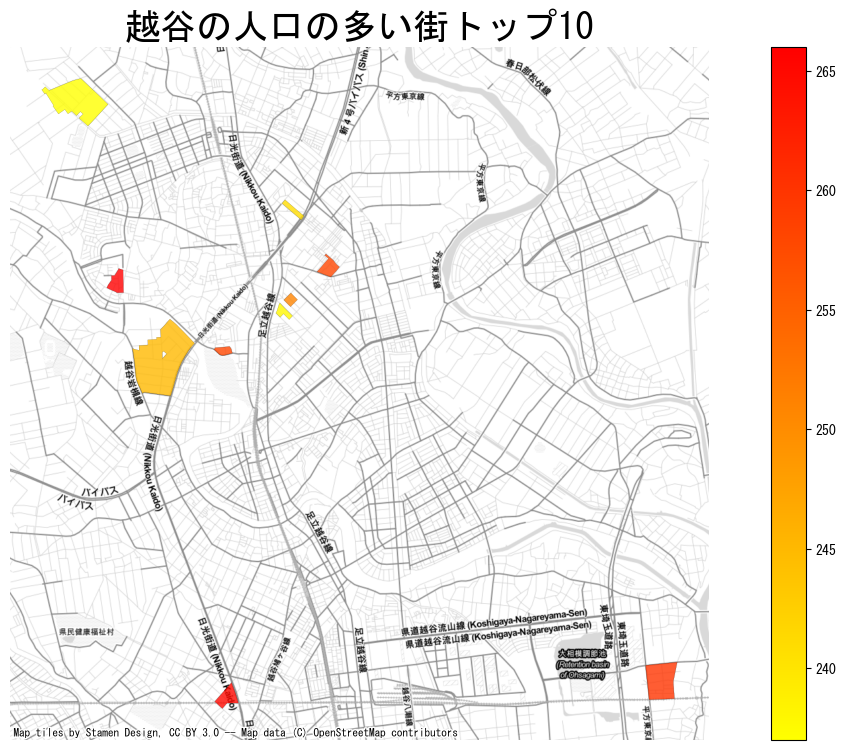

In [57]:
# axにマップをプロット
ax = gdf.head(10).plot(figsize=(16,9),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

ax.axis('off')

ax.set_title('越谷の人口の多い街トップ10',fontsize=26);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [58]:
#世帯のデータをソート
gdf = gdf.sort_values(by='SETAI', ascending=False )
gdf.head(10)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
175,1122201018,11,222,048001200,01018,埼玉県,越谷市,瓦曽根一丁目,NaN,8101,...,2220101-8-00,128,125,11,222,139.789108,35.885221,0480-01200,101-8,"POLYGON ((15561301.105 4284859.851, 15561297.3..."
3628,1122223358,11,222,033001690,23358,埼玉県,越谷市,千間台西一丁目,NaN,8101,...,2222335-8-00,103,103,11,222,139.768788,35.936474,0330-01690,2335-8,"POLYGON ((15558988.927 4291900.439, 15558992.2..."
1952,1122212791,11,222,007000130,12791,埼玉県,越谷市,大字弥十郎,NaN,8101,...,2221279-1-00,258,94,11,222,139.789369,35.921951,0070-00130,1279-1,"POLYGON ((15561233.560 4290046.697, 15561266.1..."
3169,1122219841,11,222,060000030,19841,埼玉県,越谷市,蒲生茜町,NaN,8101,...,2221984-1-00,140,94,11,222,139.789714,35.868926,0600-00030,1984-1,"POLYGON ((15561398.854 4282581.740, 15561347.4..."
2384,1122215041,11,222,066003060,15041,埼玉県,越谷市,東町三丁目,NaN,8101,...,2221504-1-00,260,92,11,222,139.832219,35.878206,0660-03060,1504-1,"POLYGON ((15566240.099 4283892.584, 15566239.4..."
1705,1122210821,11,222,031000040,10821,埼玉県,越谷市,大字大林,NaN,8101,...,2221082-1-00,211,88,11,222,139.777242,35.915224,0310-00040,1082-1,"POLYGON ((15560000.173 4289110.425, 15559999.6..."
1895,1122212361,11,222,002000320,12361,埼玉県,越谷市,大字下間久里,NaN,8101,...,2221236-1-00,234,87,11,222,139.787679,35.924635,0020-00320,1236-1,"POLYGON ((15561181.315 4290276.221, 15561091.9..."
3511,1122222341,11,222,030000010,22341,埼玉県,越谷市,大字袋山,NaN,8101,...,2222234-1-00,233,86,11,222,139.772402,35.920355,0300-00010,2234-1,"POLYGON ((15559385.758 4289582.900, 15559393.2..."
1817,1122211711,11,222,001000070,11711,埼玉県,越谷市,大字大里,NaN,8101,...,2221171-1-00,251,85,11,222,139.784249,35.918363,0010-00070,1171-1,"POLYGON ((15560793.706 4289413.549, 15560808.2..."
1948,1122212751,11,222,007000050,12751,埼玉県,越谷市,大字弥十郎,NaN,8101,...,2221275-1-00,221,85,11,222,139.791489,35.924137,0070-00050,1275-1,"POLYGON ((15561607.902 4290280.578, 15561612.0..."


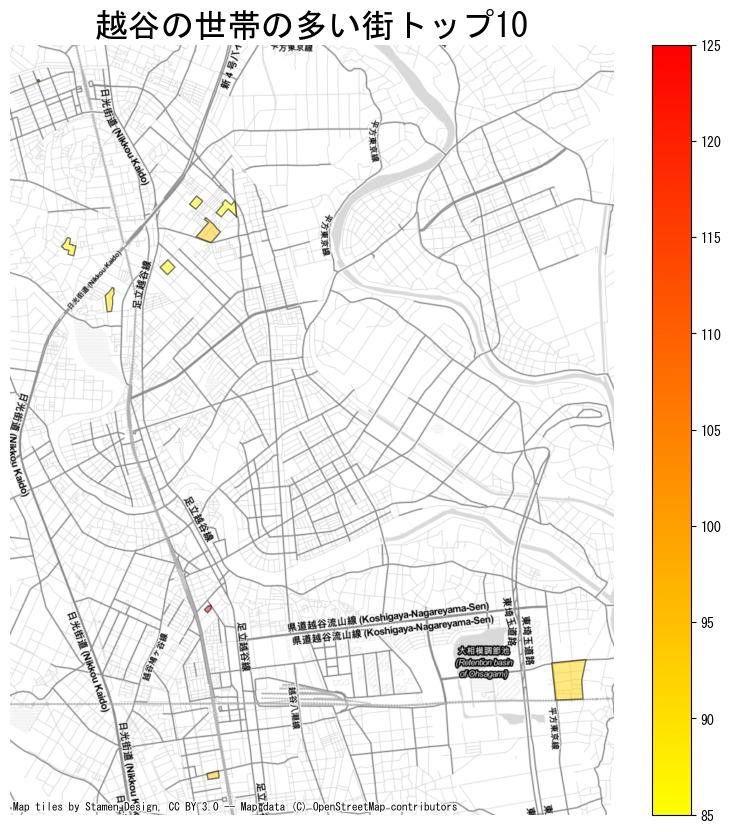

In [59]:
# population map
bx = gdf.head(10).plot(figsize=(10,10),
         column='SETAI',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=1,
         alpha=0.5)

# hide axes
bx.axis('off')

# title
bx.set_title('越谷の世帯の多い街トップ10',fontsize=24);

# add basemap
cx.add_basemap(bx,source=cx.providers.Stamen.TonerLite)

感想
住んでいる市のマップを作てみた。
主に4号バイパスの側が人口が多い。
大相模調節池はイオンレイクタウンという大型商業施設がある場所で、
最近までマンションを建てまくっていたので、そこに住む人が多いのだろう。